#Question 1

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lab_Data/glass.csv')
df

,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df = df.drop('Id number',axis=1)
df

,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#Part 1

In [ ]:
X = df.drop('Type of glass',axis=1).to_numpy()
y = df['Type of glass'].to_numpy()

In [ ]:

n = 7
km = KMeans(n_clusters=n,random_state=42)
y_km = km.fit_predict(X)

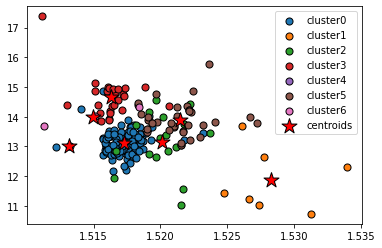

In [ ]:
for i in range(n):
  plt.scatter(X[y_km == i, 0], X[y_km == i, 1],s=50, edgecolor='black',label='cluster'+str(i))

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.show()

#Part 2

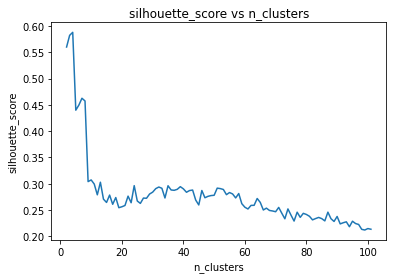

silhouette_score is maximum, when n_clusters = 4.0


In [ ]:
x_ax = np.linspace(2,101,100)
y_ax = []
for n_clust in range(2,102):
  KMean= KMeans(n_clusters=n_clust,random_state=42)
  KMean.fit(X)
  label=KMean.predict(X)
  y_ax.append(silhouette_score(X, label))

x_ax = np.array(x_ax)
y_ax = np.array(y_ax)

plt.plot(x_ax,y_ax)
plt.title("silhouette_score vs n_clusters")
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')
plt.show()
print('silhouette_score is maximum, when n_clusters =',x_ax[np.where(y_ax==y_ax.max())[0][0]])

#Part 3

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=42)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

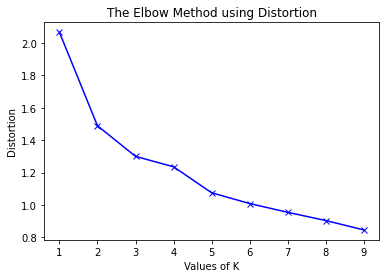

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

#Part 4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
base_clf_1 = KNeighborsClassifier(n_neighbors=1)
base_clf_1.fit(X_train,y_train)
base_clf_1.score(X_test,y_test)

0.7692307692307693

In [ ]:
model1 = BaggingClassifier(base_estimator = base_clf_1,random_state = 42)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.7384615384615385

In [ ]:
base_clf_2 = KNeighborsClassifier(n_neighbors=2)
base_clf_2.fit(X_train,y_train)
base_clf_2.score(X_test,y_test)

0.6615384615384615

In [ ]:
model2 = BaggingClassifier(base_estimator = base_clf_2,random_state = 42)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.6923076923076923

In [ ]:
base_clf_3 = KNeighborsClassifier(n_neighbors=3)
base_clf_3.fit(X_train,y_train)
base_clf_3.score(X_test,y_test)

0.6461538461538462

In [ ]:
model3 = BaggingClassifier(base_estimator = base_clf_3,random_state = 42)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.6615384615384615

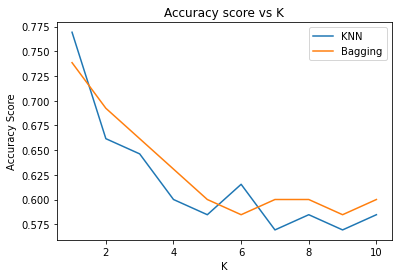

In [ ]:
x = np.linspace(1,10,10)
y_ax_knn = []
y_ax_bagging = []

for k in range(1,11):
  base_clf = KNeighborsClassifier(n_neighbors=k)
  base_clf.fit(X_train,y_train)
  y_ax_knn.append(base_clf.score(X_test,y_test))
  model = BaggingClassifier(base_estimator = base_clf,random_state = 42)
  model.fit(X_train,y_train)
  y_ax_bagging.append(model.score(X_test,y_test))


y_ax_knn = np.array(y_ax_knn)
y_ax_bagging = np.array(y_ax_bagging)
plt.plot(x,y_ax_knn,label='KNN')
plt.plot(x,y_ax_bagging,label='Bagging')
plt.title("Accuracy score vs K")
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In General, The reason for the improvement in accuracy with bagging is due to the reduction of variance. By creating multiple samples of the dataset and training separate models on each sample, we are effectively reducing the variance of the model. This reduction in variance leads to a decrease in overfitting and an improvement in the model's generalization performance.

In terms of bias, bagging does not typically have a significant effect. Since the base model is a KNN classifier, which has low bias, we do not expect bagging to have a significant impact on bias.

In summary, we have applied bagging with the KNN classifier as the base model and observed an improvement in accuracy. The improvement in accuracy is due to the reduction of variance achieved by bagging.

#Question 2

#Part A & B

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False,get_centroids=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.get_centroids = get_centroids

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        if(self.get_centroids==True):
          return self._get_cluster_labels(self.clusters),self.centroids

        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

#Part C

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
feats = olivetti.data
labels = np.unique(olivetti.target)

In [ ]:
k = KMeans(K=40, max_iters=150, plot_steps=False,get_centroids=True)
y_pred,centroids = k.predict(feats)

In [ ]:
for i in range(0,40):
  print("Number of point in cluster",i,"is:",np.count_nonzero(y_pred == i))

Number of point in cluster 0 is: 4
Number of point in cluster 1 is: 11
Number of point in cluster 2 is: 5
Number of point in cluster 3 is: 4
Number of point in cluster 4 is: 5
Number of point in cluster 5 is: 1
Number of point in cluster 6 is: 4
Number of point in cluster 7 is: 16
Number of point in cluster 8 is: 1
Number of point in cluster 9 is: 10
Number of point in cluster 10 is: 14
Number of point in cluster 11 is: 12
Number of point in cluster 12 is: 25
Number of point in cluster 13 is: 7
Number of point in cluster 14 is: 12
Number of point in cluster 15 is: 15
Number of point in cluster 16 is: 8
Number of point in cluster 17 is: 19
Number of point in cluster 18 is: 7
Number of point in cluster 19 is: 4
Number of point in cluster 20 is: 11
Number of point in cluster 21 is: 10
Number of point in cluster 22 is: 6
Number of point in cluster 23 is: 17
Number of point in cluster 24 is: 10
Number of point in cluster 25 is: 27
Number of point in cluster 26 is: 4
Number of point in clust

#Part D

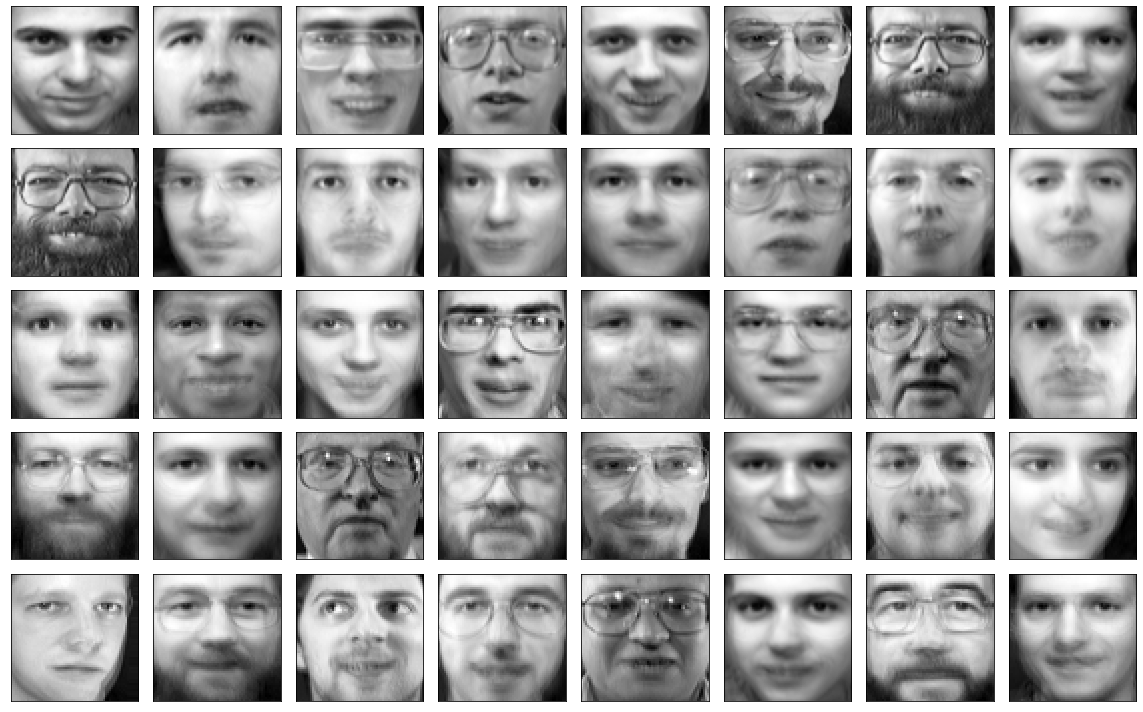

In [ ]:
cluster_centers = centroids.reshape(40, 64, 64)
fig, axs = plt.subplots(5, 8, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    if i < 40:
        ax.imshow(cluster_centers[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()

#Part E

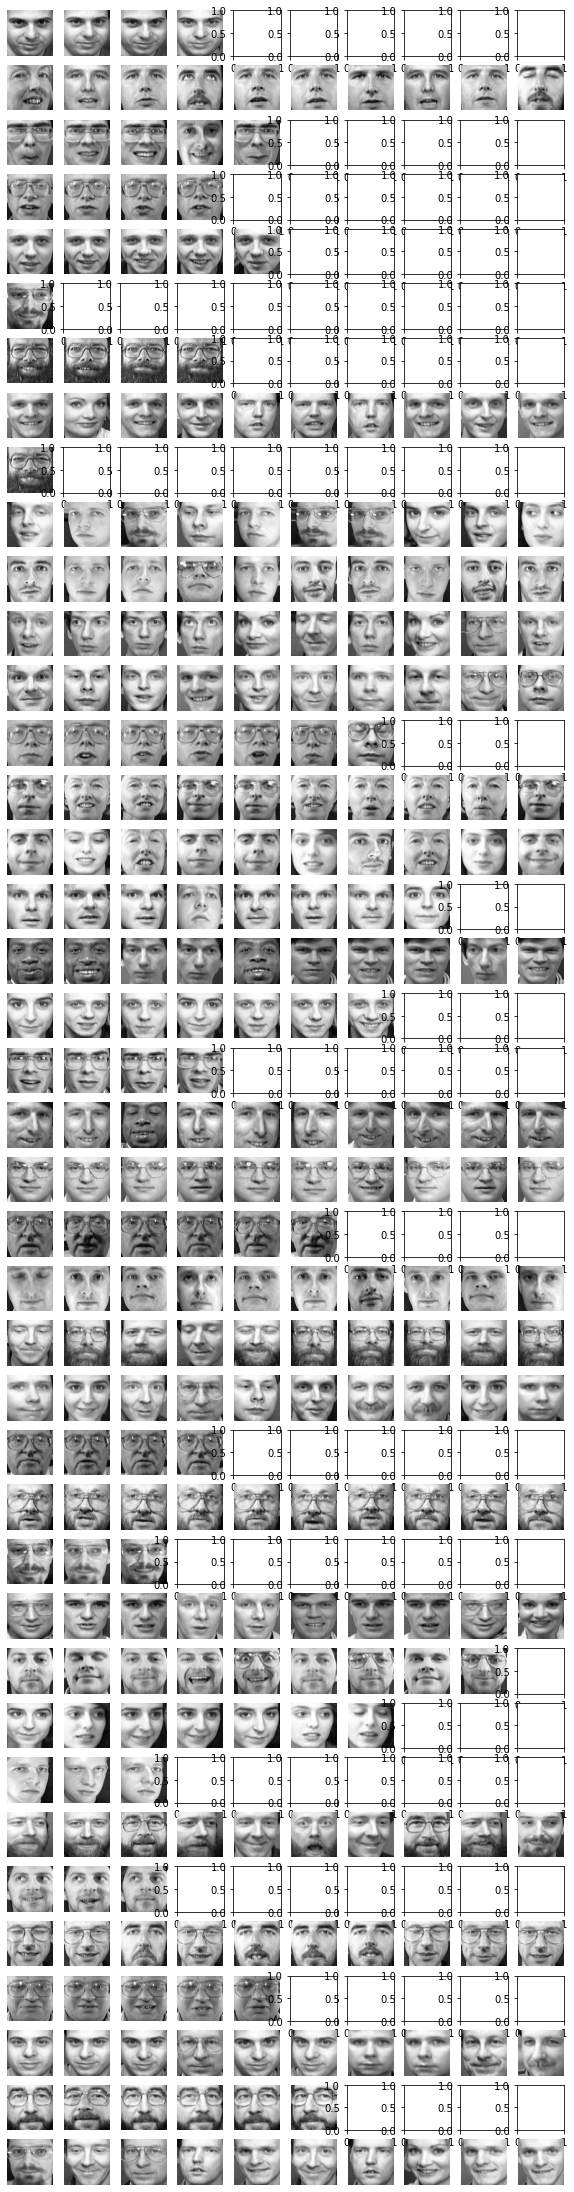

In [41]:
fig, axes = plt.subplots(nrows=40, ncols=10, figsize=(10,40))
for i in range(40):
    cluster_indices = np.where(y_pred == i)[0]
    np.random.shuffle(cluster_indices)
    if(len(cluster_indices)<=10):
      for j in range(len(cluster_indices)):
          ax = axes[i][j]
          ax.imshow(feats[cluster_indices[j]].reshape(64, 64), cmap='gray')
          ax.axis('off')
    else:
        for j in range(10):
          ax = axes[i][j]
          ax.imshow(feats[cluster_indices[j]].reshape(64, 64), cmap='gray')
          ax.axis('off')

plt.show()

#Part F

In [45]:
k2 = KMeans(K=40, max_iters=200, plot_steps=False,get_centroids=True)
y_pred2,centroids2 = k2.predict(feats)

In [46]:
for i in range(0,40):
  print("Number of point in cluster",i,"is:",np.count_nonzero(y_pred2 == i))

Number of point in cluster 0 is: 6
Number of point in cluster 1 is: 4
Number of point in cluster 2 is: 5
Number of point in cluster 3 is: 14
Number of point in cluster 4 is: 17
Number of point in cluster 5 is: 2
Number of point in cluster 6 is: 10
Number of point in cluster 7 is: 4
Number of point in cluster 8 is: 3
Number of point in cluster 9 is: 11
Number of point in cluster 10 is: 3
Number of point in cluster 11 is: 10
Number of point in cluster 12 is: 19
Number of point in cluster 13 is: 10
Number of point in cluster 14 is: 9
Number of point in cluster 15 is: 4
Number of point in cluster 16 is: 5
Number of point in cluster 17 is: 16
Number of point in cluster 18 is: 7
Number of point in cluster 19 is: 10
Number of point in cluster 20 is: 4
Number of point in cluster 21 is: 2
Number of point in cluster 22 is: 5
Number of point in cluster 23 is: 18
Number of point in cluster 24 is: 15
Number of point in cluster 25 is: 16
Number of point in cluster 26 is: 21
Number of point in cluste

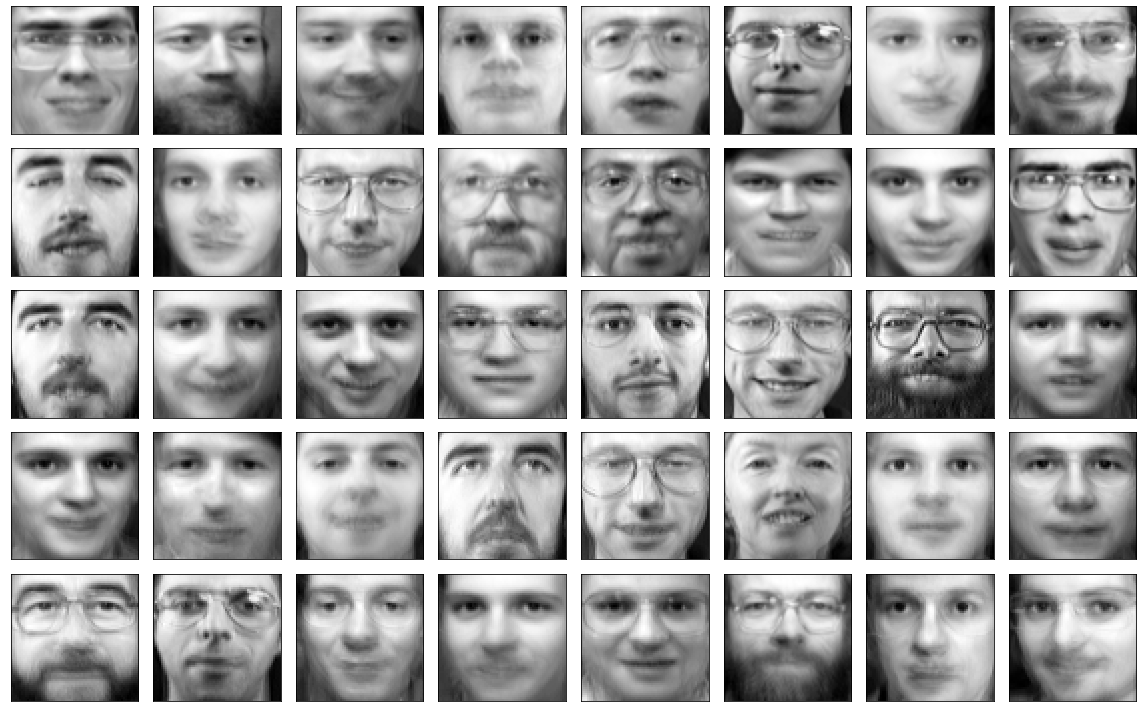

In [47]:
cluster_centers2 = centroids2.reshape(40, 64, 64)
fig, axs = plt.subplots(5, 8, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    if i < 40:
        ax.imshow(cluster_centers2[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()

#Part G

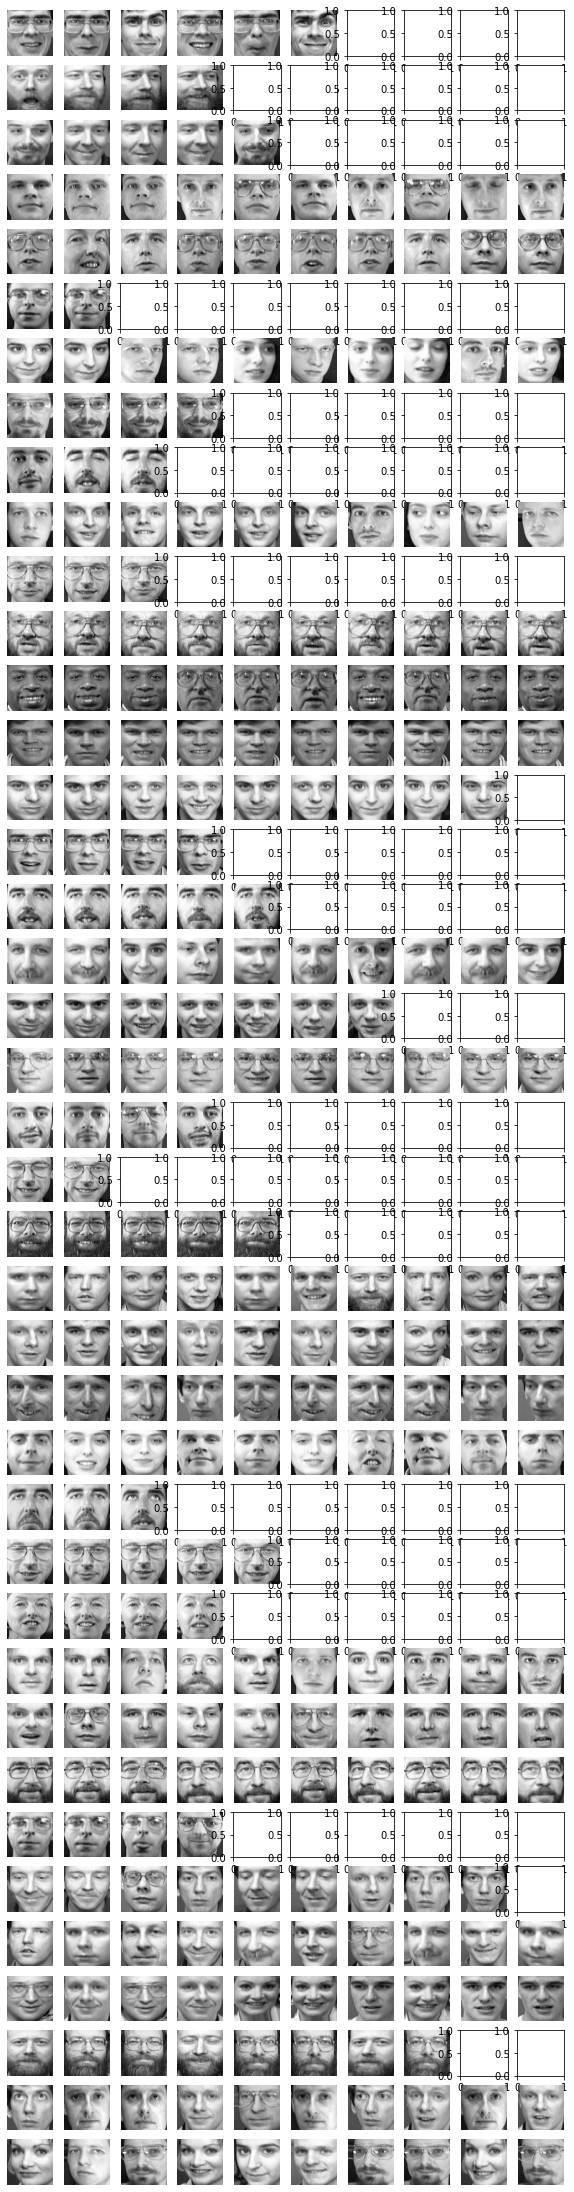

In [48]:
fig, axes = plt.subplots(nrows=40, ncols=10, figsize=(10,40))
for i in range(40):
    cluster_indices = np.where(y_pred2 == i)[0]
    np.random.shuffle(cluster_indices)
    if(len(cluster_indices)<=10):
      for j in range(len(cluster_indices)):
          ax = axes[i][j]
          ax.imshow(feats[cluster_indices[j]].reshape(64, 64), cmap='gray')
          ax.axis('off')
    else:
        for j in range(10):
          ax = axes[i][j]
          ax.imshow(feats[cluster_indices[j]].reshape(64, 64), cmap='gray')
          ax.axis('off')

plt.show()

#Question 3

#Part 1

In [57]:
df2 = pd.read_csv('/content/drive/MyDrive/Lab_Data/Wholesale customers data.csv')
df2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [58]:
def normalize(df):
  #using The min-max feature scaling for normalizating columns individuallly whose data type is integer
  for column in df.columns:
    if column != 'Channel' and column != 'Region' :
      df[column] = (df[column] - df[column].mean())/(df[column].std())
  return df

df2_scaled = normalize(df2)
df2_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,2,3,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,2,3,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,1,3,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,2,3,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870
...,...,...,...,...,...,...,...,...
435,1,3,1.399719,0.847482,0.849793,2.072862,-0.566186,0.240817
436,1,3,2.152842,-0.591469,-0.756304,0.296223,-0.584853,0.291170
437,2,3,0.200098,1.313176,2.345716,-0.542762,2.508362,0.121318
438,1,3,-0.135230,-0.516947,-0.601829,-0.418964,-0.569122,0.212804


#Part 2

In [59]:
covariance = df2_scaled.cov()
covariance

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,0.219072,0.022479,-0.079181,0.215641,0.284946,-0.094568,0.297693,0.026216
Region,0.022479,0.599498,0.042807,0.024999,0.005959,-0.016294,-0.001148,0.035006
Fresh,-0.079181,0.042807,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.215641,0.024999,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.284946,0.005959,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.094568,-0.016294,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.297693,-0.001148,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.026216,0.035006,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


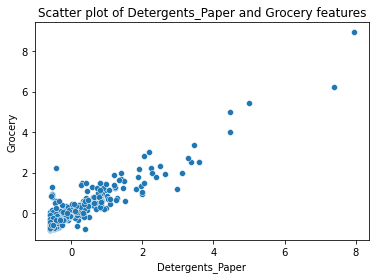

In [61]:
sns.scatterplot(x='Detergents_Paper', y='Grocery', data=df2_scaled)
plt.title("Scatter plot of Detergents_Paper and Grocery features")
plt.xlabel("Detergents_Paper")
plt.ylabel("Grocery")
plt.show()

#Part 3

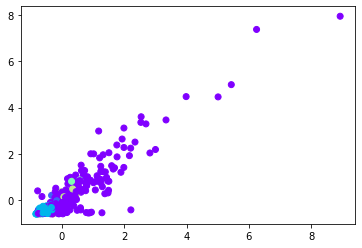

Labels : [-1  0  1  2  3  4  5  6  7]


In [64]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df2_scaled)
plt.scatter(df2_scaled['Grocery'], df2_scaled['Detergents_Paper'], c=labels, cmap='rainbow')
plt.show()
print("Labels :",np.unique(labels))

#Part 4

In [69]:
from sklearn.cluster import KMeans as kmeans
kmns = kmeans(n_clusters=9,random_state=42)
y_kmns = kmns.fit_predict(df2_scaled)

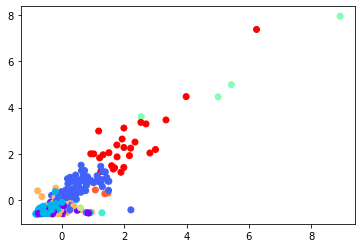

In [71]:
plt.scatter(df2_scaled['Grocery'], df2_scaled['Detergents_Paper'], c=y_kmns, cmap='rainbow')
plt.show()

#Part 5

In [90]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=2000, noise=0.05, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)

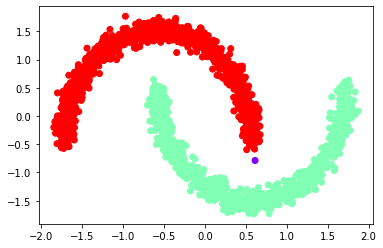

Labels : [-1  0  1]


In [93]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.show()
print("Labels :",np.unique(labels))

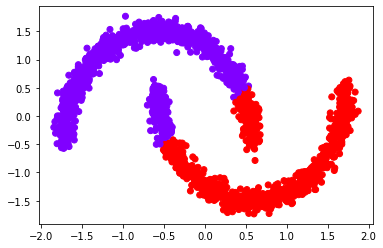

In [94]:
kmns = kmeans(n_clusters=2,random_state=42)
y_kmns = kmns.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmns, cmap='rainbow')
plt.show()